In [ ]:
#Assignment 1 by Jerwin Cabaneros
#Student ID 40204404

# "If Monet Painted Manila"
# Prompt Concept:
# A speculative AI art experiment exploring how Claude Monet's romanticizing
# impressionist technique would transform contemporary Manila. What happens when
# soft brushstrokes, dreamy light, and pastoral beauty meet jeepney exhaust,
# garbage fires, and flooded streets? The project imagines an alternate history
# where Manila's urban chaos receives the same aesthetic treatment as Monet's
# Seine, revealing both the seductive power and ethical blindness of romanticization.


In [1]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")


Using device: cuda


In [58]:
# Clear widget metadata
from IPython.display import Javascript
display(Javascript('IPython.notebook.metadata.widgets = {}'))

<IPython.core.display.Javascript object>

In [2]:
# @title
from transformers import pipeline

classifier = pipeline(task="text-classification",
                      model="distilbert-base-uncased-finetuned-sst-2-english",
                      device=device)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda


# Basic image generation with Diffusers

The Diffusers library is developed and maintained by Hugging Face. It comes with several diffusion models for image, video, and audio generation.

You can find the source code and documentation on GitHub:

https://github.com/huggingface/diffusers

In [5]:
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained(
    # "Lykon/dreamshaper-8",
    # "stabilityai/sd-turbo",
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16,
    ).to(device)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
# Define your prompt
prompt = "A generative abstract image composed of layered geometric forms, emergent symmetry, controlled randomness, limited palette of three colors, no figurative elements, visual structure suggests algorithmic repetition and drift."
# prompt = (
#     "A 1950s diner on Mars with hovering cars parked outside, "
#     "in the style of Brazilian bossa nova and MPB album covers, "
#     "cinematic lighting, detailed scene, hyperrealistic textures, "
# )

# Generate and save the image
image = pipe(prompt).images[0]
image

# If instead of displaying the resulting media object we want to save it to the
# Linux machine where you are running your code, you can do:
image.save("output_image.png")

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

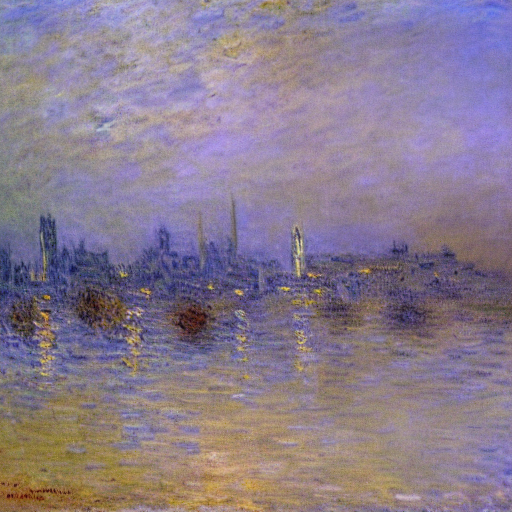

In [47]:
prompt = "Wide-angle Claude Monet impressionist oil painting, thick visible brushstrokes, palette knife impasto, muted dusty blues faded ochres pale grays, diffused smog-filtered light, Manila crumbling concrete buildings dissolving into brushwork, jeepney smoke as lavender mist, flooded streets romanticized as water lilies, dystopian stillness beautified, pollution as atmospheric haze"
pipe(prompt).images[0]


  0%|          | 0/50 [00:00<?, ?it/s]

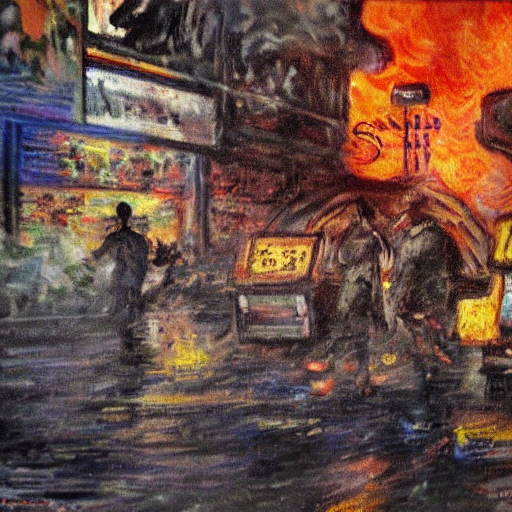

In [57]:
prompt = "Close-up Claude Monet impressionist oil painting, bold visible brushstrokes, broken color, smoldering burnt siennas charcoal grays ember oranges, garbage fires as dancing flames, spinning electric fan, burned-out neon signs as film frames, street vendor with mismatched shadow, jeepney smoke swirling, typhoon debris."
pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

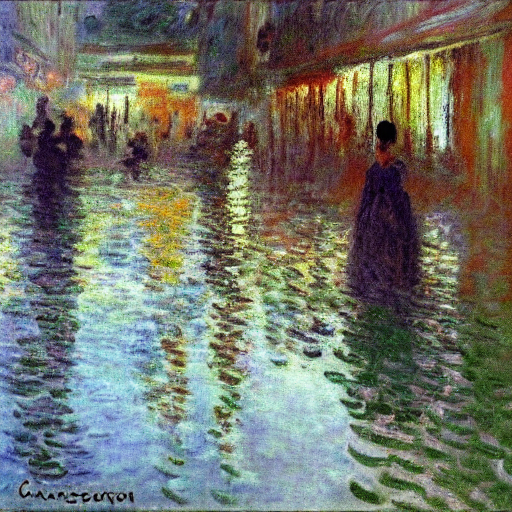

In [48]:
prompt = "Eye-level Claude Monet impressionist oil painting, rhythmic brushstrokes, dappled color, nocturnal deep indigos moonlit silvers muted teals, soft brownout light, flooded street as gestural strokes, sari-sari store windows puddle reflections as mirrors, jeepney headlights as projector beams, collective dreaming in kariton shanties, beautified poverty as impressionist masterpiece"
pipe(prompt).images[0]